**Libraries**

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

**SVD**

1.   **Full SVD:** full matrix = true
2.   **Compact SVD:** full matrix = false




In [ ]:
A = np.random.rand(1000,500)
A

array([[0.8384749 , 0.1242297 , 0.02549154, ..., 0.75786565, 0.9642712 ,
        0.2206442 ],
       [0.50731198, 0.76638893, 0.30687062, ..., 0.39591137, 0.65922648,
        0.65092213],
       [0.44540521, 0.47608634, 0.48083662, ..., 0.36752917, 0.07436568,
        0.09119062],
       ...,
       [0.00259095, 0.26501272, 0.43679702, ..., 0.133361  , 0.56425516,
        0.19939676],
       [0.35782028, 0.28217023, 0.81324456, ..., 0.06588587, 0.63429127,
        0.55154832],
       [0.41856151, 0.86459293, 0.7380276 , ..., 0.02916364, 0.69080519,
        0.07425694]])

In [ ]:
U, s, VT = np.linalg.svd(A, full_matrices = False)
#U, s, VT = la.svd(A)
print('U shape: ', U.shape)
print('s shape: ', s.shape)
print('VT shape: ', VT.shape)


U shape:  (1000, 500)
s shape:  (500,)
VT shape:  (500, 500)


s is a vector made of the eigenvalues => We build **Sigma**, diagonal matrix, with the eigenvalues on the diagonal 

In [ ]:
S =np.diag(s)

Plot the **trend** of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

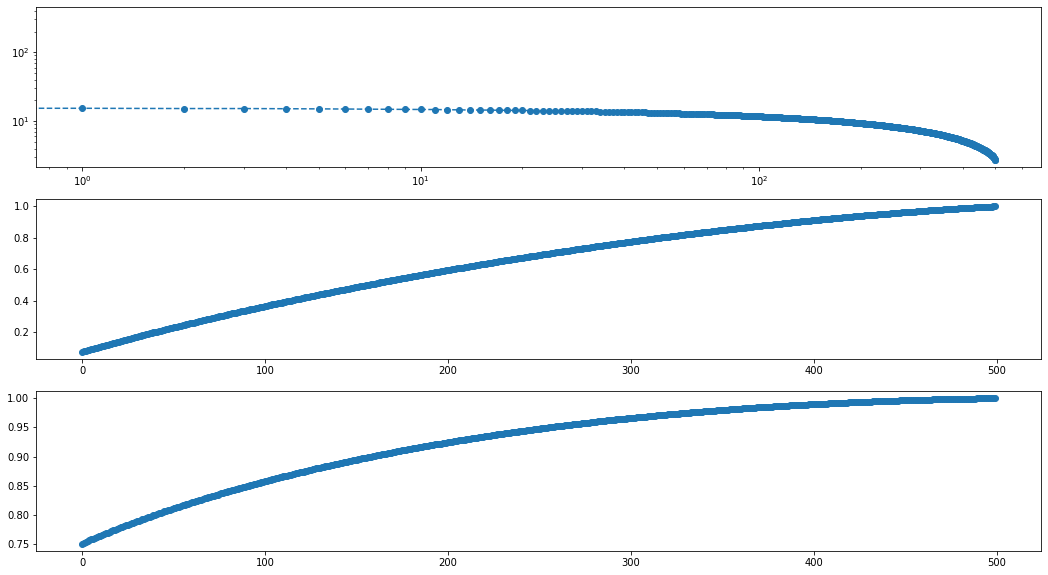

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(18,10),)
axs[0].loglog(s, 'o--')
axs[1].plot(np.cumsum(s)/np.sum(s), 'o--')
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o--')

Visualize the best **rank-$k$ matrices**, for $k$ = 1, 5, 10, 50, 100, 500

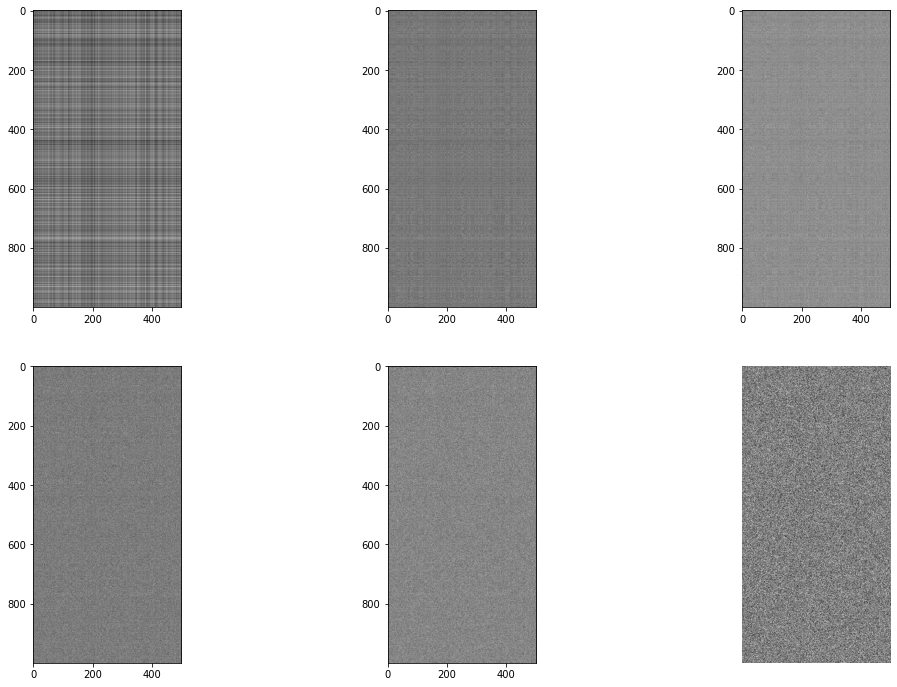

In [ ]:
k = 100
Ak = U[:,:k] @ np.diag(s[:k]) @ VT[:k,:]


fig, axs = plt.subplots(2,3, figsize=(18,12),)
axs = axs.flatten()
k_values = [1,5,10,50,100,500]
for (i,k) in enumerate(k_values):
  Xk = U[:,:k] @ np.diag(s[:k]) @ VT[:k,:]
  img = axs[i].imshow(Xk) # Python use some color mapping 
  plt.axis('off')
  img.set_cmap('gray')